In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=50000)
fares = pd.read_csv(trip_fare_file, nrows=50000)

In [3]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [4]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

# Prepare Time

In [5]:
full_tripdata[" pickup_datetime"] = pd.to_datetime(full_tripdata[" pickup_datetime"])
full_tripdata[" dropoff_datetime"] = pd.to_datetime(full_tripdata[" dropoff_datetime"])

full_tripdata["weekday"] = full_tripdata[" pickup_datetime"].dt.dayofweek
full_tripdata["hourofday"] = full_tripdata[" pickup_datetime"].dt.hour

In [6]:
import seaborn as sns

In [8]:
full_tripdata[[" fare_amount"]].describe()

,fare_amount
count,50000.000000
mean,12.522339
std,9.755557
min,2.500000
25%,6.500000
50%,9.500000
75%,15.000000
max,350.000000


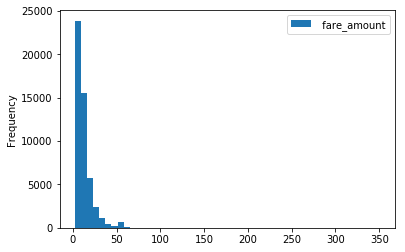

In [9]:
full_tripdata[[" fare_amount"]].plot.hist(bins=50)

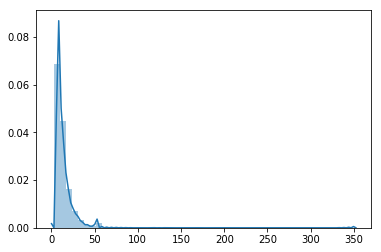

In [10]:
sns.distplot(full_tripdata[[" fare_amount"]])

In [11]:
full_tripdata = full_tripdata.drop(columns=['medallion',' hack_license',' vendor_id',' rate_code',' store_and_fwd_flag'])

In [12]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

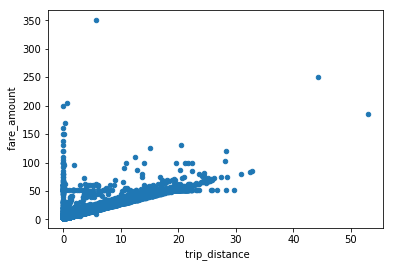

In [13]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

In [14]:
#check data whose trip distance is 0 

zero_distance = full_tripdata.loc[(full_tripdata[' trip_distance'] == 0)]

zero_distance.describe()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday
count,265.000000,265.000000,265.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,1.637736,62.818868,0.0,-28.471470,15.681316,-20.652789,11.377632,30.662868,0.135849,0.341509,4.311057,0.751094,36.202377,4.716981,7.969811
std,1.211096,326.485761,0.0,36.059938,19.860852,33.242449,18.313628,32.183460,0.250828,0.233090,6.776104,2.510965,35.702585,0.451318,8.823127
min,1.000000,0.000000,0.0,-74.095093,0.000000,-74.048233,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
25%,1.000000,0.000000,0.0,-73.977303,0.000000,-73.809486,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,8.500000,4.000000,1.000000
50%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.500000,1.000000,0.000000,21.600000,5.000000,4.000000
75%,2.000000,0.000000,0.0,0.000000,40.730572,0.000000,40.674305,52.000000,0.000000,0.500000,7.000000,0.000000,60.500000,5.000000,19.000000
max,6.000000,3600.000000,0.0,0.000000,41.026131,0.000000,41.026146,199.000000,1.000000,0.500000,50.000000,17.000000,219.330000,5.000000,23.000000


In [16]:
columnName = ' trip_distance'
print full_tripdata[columnName].describe()

#full_tripdata.astype(bool).sum(axis=0)

count    50000.000000
mean         3.124457
std          3.207894
min          0.000000
25%          1.170000
50%          2.070000
75%          3.840000
max         52.920000
Name:  trip_distance, dtype: float64


# Remove trips whose trip_time, trip_distance, hour, weekday, coordinates is 0

In [17]:
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]

full_tripdata = full_tripdata.loc[(full_tripdata[' trip_distance'] != 0) & (full_tripdata[' trip_time_in_secs'] != 0)]

full_tripdata = full_tripdata.loc[(full_tripdata['weekday'] != 0) & (full_tripdata['hourofday'] != 0)]

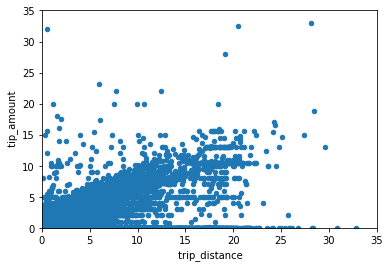

In [18]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,35))

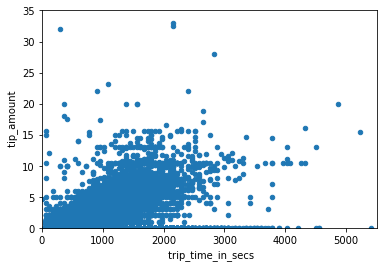

In [19]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,5500))

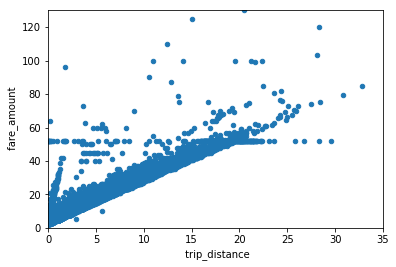

In [20]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,35))

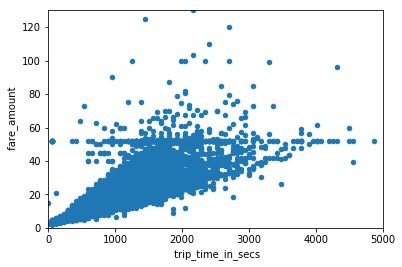

In [21]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,5000))

In [22]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

# Relationship with categorical features

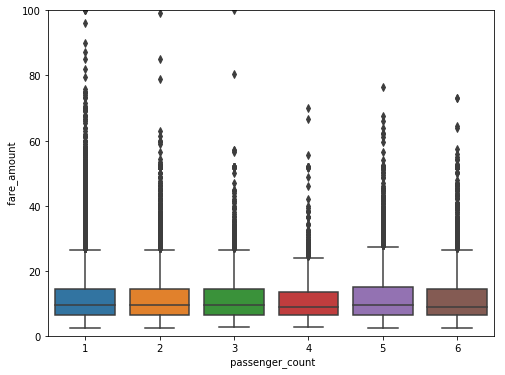

In [23]:

columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

# Conclusion , passenger_count has no correlation with fare_amount

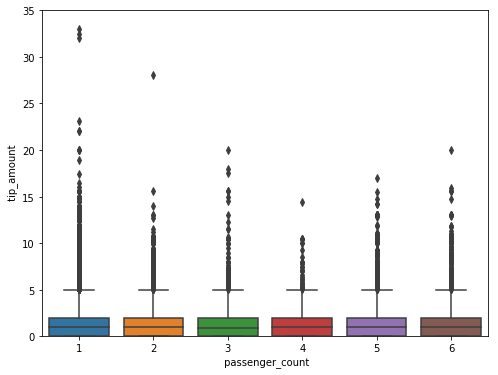

In [24]:
columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , passenger_count has no correlation with tip_amount

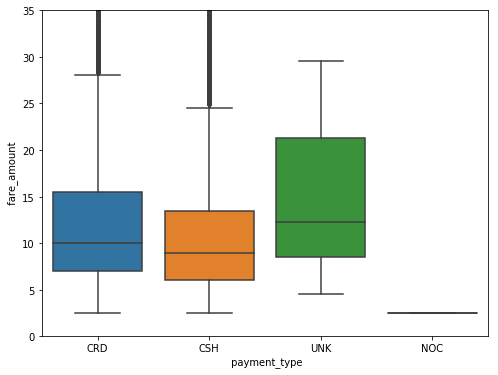

In [25]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , payment_tyep has some correlation with fare_amount, UNK is more frequently used for higher fare amount

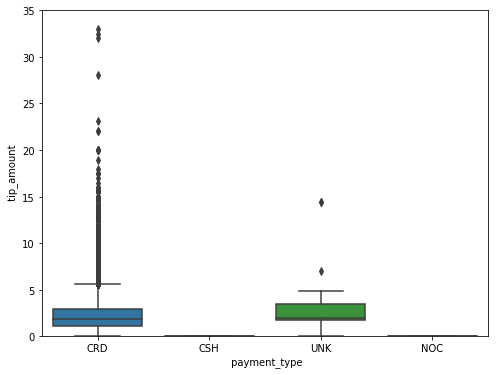

In [26]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# People are more willing to give tip when using card or "UNK"

In [94]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

In [93]:
full_tripdata.describe()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday
count,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000,39865.000000
mean,2.148050,698.415001,3.091756,-73.972208,40.746794,-73.968496,40.747350,12.252145,0.540223,0.499247,1.332474,0.174050,14.798140,4.345090,14.792098
std,1.728021,466.530926,3.194793,0.642095,0.168707,0.642950,0.035171,9.298458,0.196373,0.019383,2.239738,1.026848,10.975839,0.490927,9.118207
min,1.000000,1.000000,0.010000,-75.316666,40.184036,-74.368393,40.188648,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
25%,1.000000,360.000000,1.160000,-73.993599,40.728916,-73.992180,40.727680,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000,4.000000,4.000000
50%,1.000000,600.000000,2.030000,-73.984779,40.745922,-73.981720,40.747749,9.500000,0.500000,0.500000,1.000000,0.000000,11.500000,4.000000,20.000000
75%,3.000000,900.000000,3.750000,-73.971779,40.763000,-73.961563,40.766457,14.500000,0.500000,0.500000,2.000000,0.000000,17.300000,5.000000,22.000000
max,6.000000,7500.000000,52.920000,-0.001667,73.972099,0.000000,41.453693,350.000000,1.000000,0.500000,188.250000,18.250000,350.500000,6.000000,23.000000


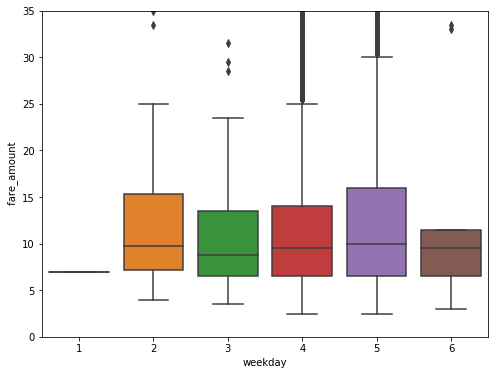

In [95]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

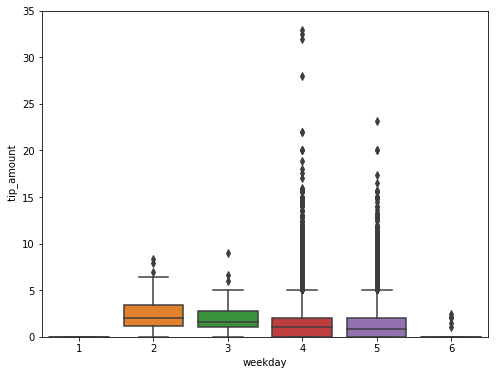

In [96]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

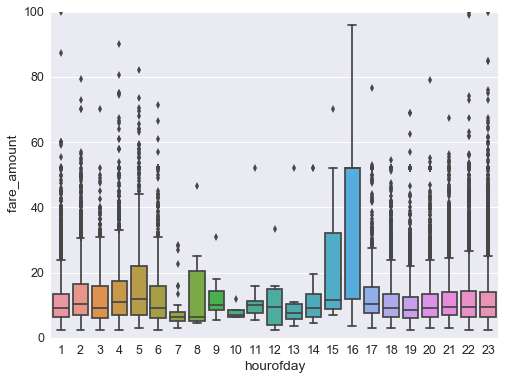

In [112]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

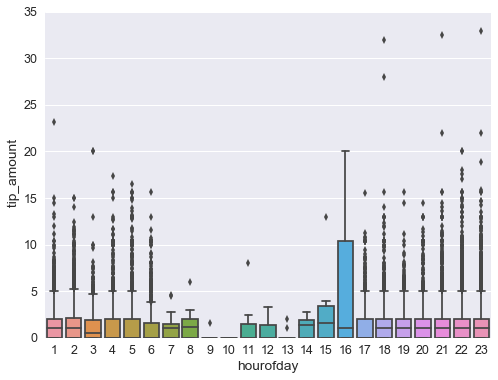

In [110]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation matrix

In [27]:
import numpy as np

In [28]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday'],
      dtype='object')

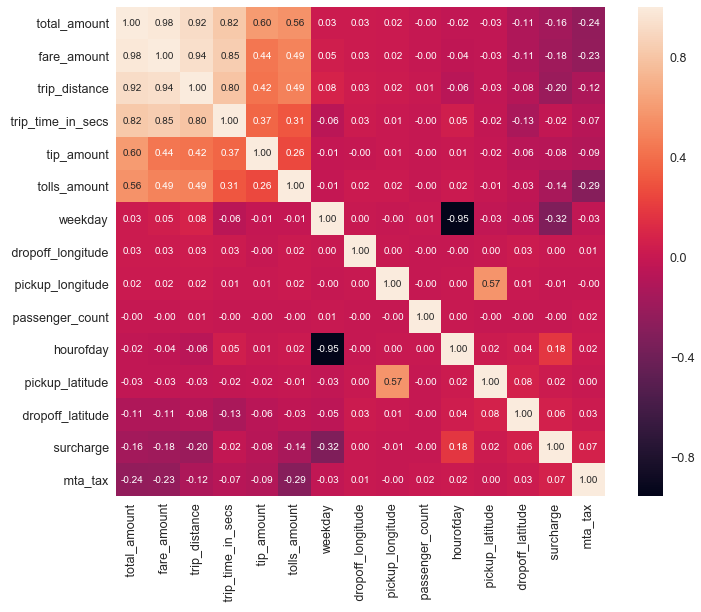

In [107]:
corrmat = full_tripdata.corr()

k = 18
cols = corrmat.nlargest(k, ' total_amount')[' total_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Process Coordinates 

In [29]:
import pickle
from sklearn.cluster import KMeans

model = pickle.load(open('location_cluster_kmean', 'rb'))

In [30]:
model.labels_

array([ 32,   3,  92, ...,  93,  86, 114])

In [31]:
pickupLocations = full_tripdata.iloc[:,5:7]

pickupLocations.columns

Index([u' pickup_longitude', u' pickup_latitude'], dtype='object')

In [32]:
full_tripdata["pickupLoc"] = model.predict(pickupLocations.as_matrix())

In [33]:
full_tripdata["pickupLoc"]

0         32
2          3
3         92
4         96
5        180
6        127
7        126
8        184
9         32
10       195
11        84
12        43
13       174
14       141
15         9
16        23
17       173
18        71
19        98
20        85
21        89
22       150
23       176
24        96
26        75
28        36
29       174
30       159
31        63
32       139
        ... 
49958    102
49959     84
49960    141
49961    154
49965     69
49972    157
49974    178
49976    107
49977     12
49978    182
49979     16
49980    133
49981    189
49982     79
49983    191
49984    130
49985    181
49986    141
49987     63
49988     14
49989     50
49990      5
49991    183
49992     52
49993     30
49995    119
49996    161
49997     27
49998     21
49999    142
Name: pickupLoc, Length: 39865, dtype: int32

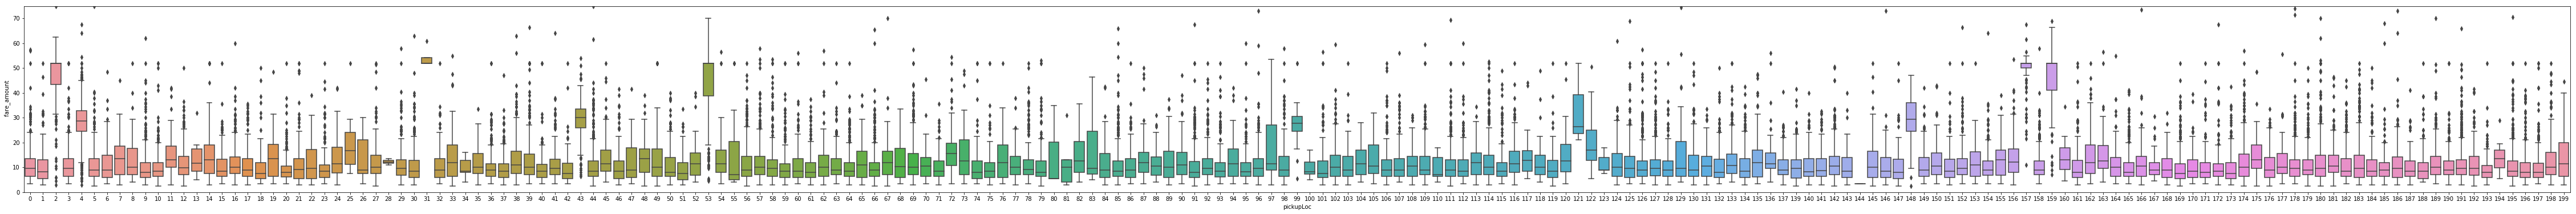

In [35]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

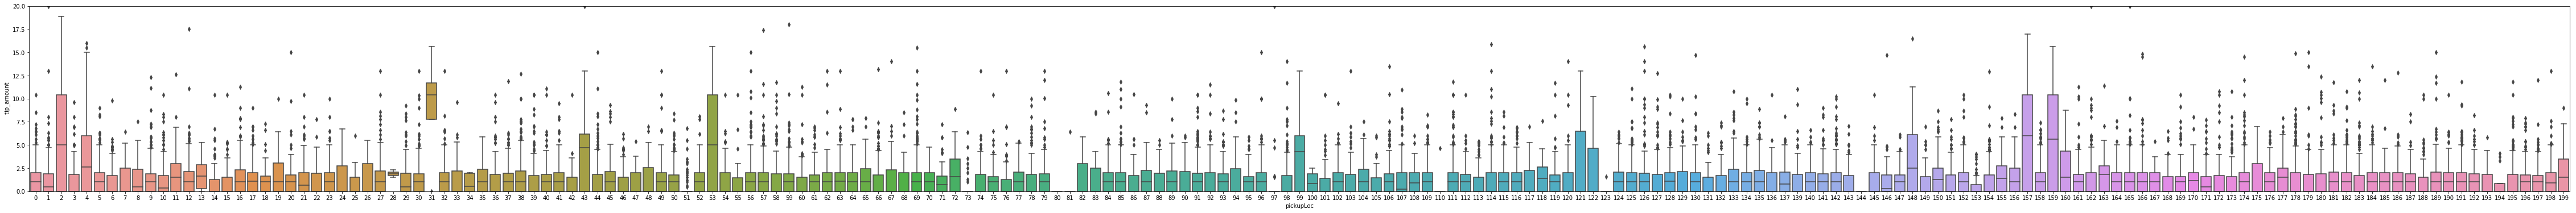

In [36]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=20);

In [37]:
data.groupby(by=['pickupLoc']).sum().sort_values(by=[" tip_amount"],ascending=False)

,tip_amount
pickupLoc,
4,1220.82
53,1048.46
38,894.80
43,799.57
12,775.17
191,682.08
189,674.73
56,670.87
2,663.55


In [38]:
data.groupby(by=['pickupLoc']).count().sort_values(by=[" tip_amount"],ascending=False)

,tip_amount
pickupLoc,
38,627
191,598
12,560
5,519
56,494
189,494
91,478
142,467
66,462


In [39]:
dropoffLocations = full_tripdata.iloc[:,7:9]
print dropoffLocations.columns
full_tripdata["dropoffLoc"] = model.predict(dropoffLocations.as_matrix())

Index([u' dropoff_longitude', u' dropoff_latitude'], dtype='object')


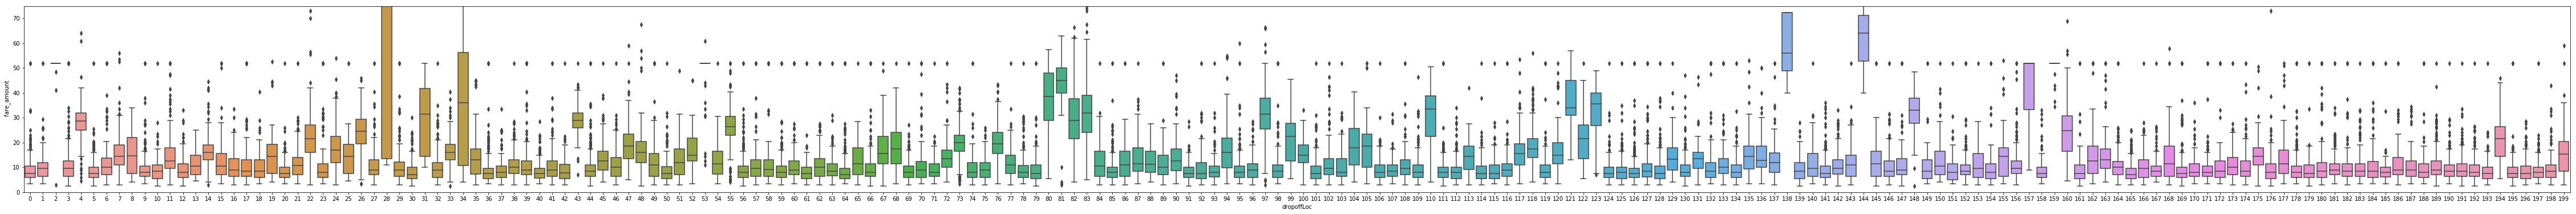

In [40]:
columnName = 'dropoffLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

In [41]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday', u'pickupLoc', u'dropoffLoc'],
      dtype='object')

In [42]:
training = full_tripdata.drop(columns=[' pickup_datetime',
                                       ' dropoff_datetime',
                                       ' trip_time_in_secs',
                                       ' trip_distance',
                                       ' dropoff_longitude',
                                       ' dropoff_latitude',
                                       ' surcharge',
                                       ' mta_tax',
                                       ' tolls_amount',
                                       ' total_amount',
                                       ' passenger_count',
                                       ' payment_type',
                                       ' pickup_longitude',
                                       ' pickup_latitude'])

In [43]:
training.columns

Index([u' fare_amount', u' tip_amount', u'weekday', u'hourofday', u'pickupLoc',
       u'dropoffLoc'],
      dtype='object')

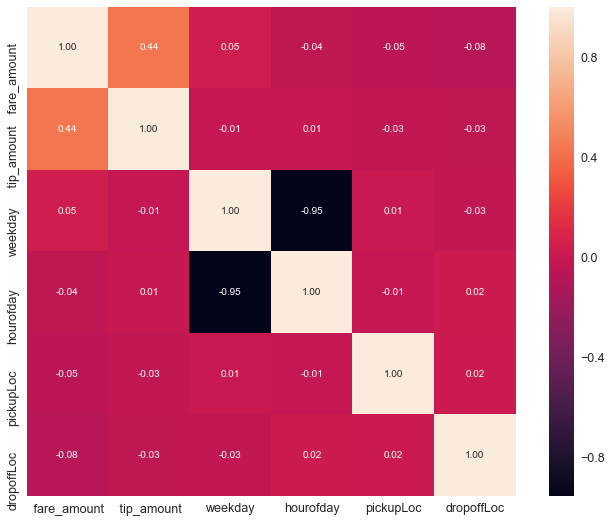

In [140]:
corrmat = training.corr()

k = 6
cols = corrmat.nlargest(k, ' fare_amount')[' fare_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
training.columns

Index([u' fare_amount', u' tip_amount', u'weekday', u'hourofday', u'pickupLoc',
       u'dropoffLoc'],
      dtype='object')

In [45]:
training.dtypes

 fare_amount    float64
 tip_amount     float64
weekday           int64
hourofday         int64
pickupLoc         int32
dropoffLoc        int32
dtype: object

In [46]:
training['weekday'] = training['weekday'].astype('category')
training['hourofday'] = training['hourofday'].astype('category')
training['pickupLoc'] = training['pickupLoc'].astype('category')
training['dropoffLoc'] = training['dropoffLoc'].astype('category')

In [47]:
training.dtypes

 fare_amount     float64
 tip_amount      float64
weekday         category
hourofday       category
pickupLoc       category
dropoffLoc      category
dtype: object

In [50]:
X = training.iloc[:,2:]
X.columns

Index([u'weekday', u'hourofday', u'pickupLoc', u'dropoffLoc'], dtype='object')

In [51]:
Y_fare = training.iloc[:,0]
Y_tip = training.iloc[:,1]

In [52]:
X = pd.get_dummies(X)

In [53]:
X.columns

Index([u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5',
       u'weekday_6', u'hourofday_1', u'hourofday_2', u'hourofday_3',
       u'hourofday_4',
       ...
       u'dropoffLoc_190', u'dropoffLoc_191', u'dropoffLoc_192',
       u'dropoffLoc_193', u'dropoffLoc_194', u'dropoffLoc_195',
       u'dropoffLoc_196', u'dropoffLoc_197', u'dropoffLoc_198',
       u'dropoffLoc_199'],
      dtype='object', length=428)

In [55]:
X = X.as_matrix()


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [56]:
Y_fare = Y_fare.tolist()
Y_tip = Y_tip.tolist()

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

clf = GridSearchCV(SVR(), param_grid, cv=4,
                       n_jobs=-1,scoring='neg_mean_squared_error')

In [ ]:
clf.fit(X,Y_fare)